In [1]:
import sys
sys.path.append("..")

In [5]:
import torch
torch.__version__

c:\Users\moi3n\miniconda3\envs\pytorchGPU\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.1'

In [6]:
import numpy as np
from torch.utils.data import Dataset
from glob import glob
from skimage import io
import os
from torchvision import datasets, transforms
import matplotlib
import os
import gc
import random
from datetime import date, datetime
import json
import pprint
os.cpu_count()

20

In [7]:
# create a folder called 'results' in the current directory if it doesn't exist
if not os.path.exists('results'):
    os.mkdir('results')

In [8]:
# Format the date and time
now = datetime.now()
start_string = now.strftime("%Y-%m-%d %H:%M:%S")
print("Current Date and Time:", start_string)

Current Date and Time: 2023-05-09 16:24:08


In [9]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [10]:
from dataset.data_loaders import *
from dataset.utils.plot_utils import plot_s1s2_tensors, save_s1s2_tensors_plot
#from config import *
from train_utils import *

In [11]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [12]:
s1_t1_dir_train="E:\\s1s2\\2021\\s1_imgs\\test"
s2_t1_dir_train="E:\\s1s2\\2021\\s2_imgs\\test"
s1_t2_dir_train="E:\\s1s2\\2019\\s1_imgs\\test"
s2_t2_dir_train="E:\\s1s2\\2019\\s2_imgs\\test"
s1_t1_dir_test="E:\\s1s2\\2021\\s1_imgs\\test"
s2_t1_dir_test="E:\\s1s2\\2021\\s2_imgs\\test"
s1_t2_dir_test="E:\\s1s2\\2019\\s1_imgs\\test"
s2_t2_dir_test="E:\\s1s2\\2019\\s2_imgs\\test"

In [13]:
transform = transforms.Compose([S2S1Normalize(),myToTensor()])
test_dataset = Sen12Dataset(s1_t1_dir=s1_t1_dir_test,
                            s2_t1_dir=s2_t1_dir_test,
                            s1_t2_dir=s1_t2_dir_test,
                            s2_t2_dir=s2_t2_dir_test,
                            transform=transform,
                            two_way=True)


In [418]:
rand_n = random.randint(0, len(test_dataset))
rand_n

226

In [419]:
s2t2,s1t2,s2t1,s1t1,cm,rcm,s1cm = test_dataset[rand_n]

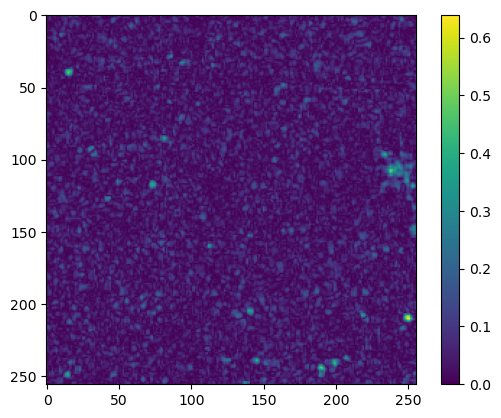

In [420]:
diff = torch.abs((s1t2*0.5 + 0.5)  - (s1t1*0.5 + 0.5))

plt.imshow(diff[0,:,:])
plt.colorbar()

In [421]:
from skimage.filters import threshold_otsu


In [422]:
diff_np = diff.numpy()
thresh = threshold_otsu(diff_np)
thresh

0.06122

In [423]:
binary_diff = (diff_np > thresh).astype(int)

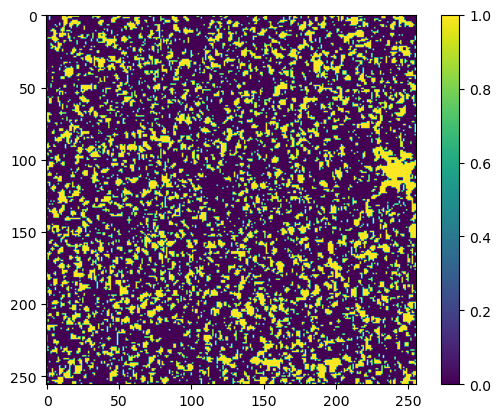

In [424]:
plt.imshow(binary_diff[0,:,:])
plt.colorbar()

In [425]:
def triclass(img, stopval=0.01, repeatnum=10):
    # Convert the input image to a numpy array
    img = np.array(img)

    # Get the minimum and maximum pixel values
    min_val = np.min(img)
    max_val = np.max(img)

    # Normalize the image so that its pixel values range from 0 to 1
    img_norm = (img - min_val) / (max_val - min_val)

    # Initialize the threshold to be 0.2
    threshold = 0.1

    # Perform iterative thresholding
    for i in range(1, repeatnum+1):
        # Divide the image into three classes based on the current threshold
        class1 = img_norm[img_norm <= threshold]
        class2 = img_norm[(img_norm > threshold) & (img_norm < 1)]
        class3 = img_norm[img_norm >= 1]

        # Compute the mean pixel value of each class
        mean1 = np.mean(class1)
        mean2 = np.mean(class2)
        mean3 = np.mean(class3)

        # Compute the new threshold as the average of the means of the three classes
        new_threshold = (mean1 + mean2 + mean3) / 3

        # Check if the difference between the new and old thresholds is smaller than the preset threshold
        if abs(new_threshold - threshold) < stopval:
            break

        # Update the threshold
        threshold = new_threshold

    # Convert the threshold back to the original pixel value range
    threshold = threshold * (max_val - min_val) + min_val

    # Apply the threshold to the input image
    img_thres = img >= threshold

    # Return the thresholded image
    return threshold


In [426]:
thresh = triclass(diff_np)
thresh

0.37396113077799475

In [427]:
binary_diff = (diff_np > thresh).astype(int)

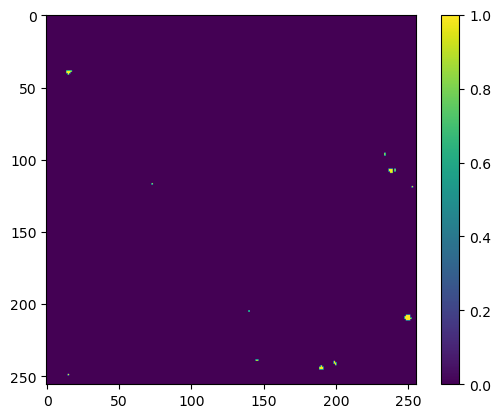

In [428]:
plt.imshow(binary_diff[0,:,:])
plt.colorbar()